# Map plotting

Just want to make some nice publication quality images of S2 and SD data.

In [240]:
from netCDF4 import Dataset as NetCDFFile 
import matplotlib.pyplot as plt
import numpy as np
import geopandas
import rasterio
from mpl_toolkits.basemap import Basemap

import rioxarray
import xarray
import fiona
from fiona import transform
from rasterio.plot import show

In [76]:
nc = NetCDFFile('S2_downloads/acolite_output/S2A_MSI_2022_06_04_11_45_43_T30VVH_L2W.nc')


In [89]:
xds = xarray.open_dataset('S2_downloads/acolite_output/S2A_MSI_2022_06_04_11_45_43_T30VVH_L2W.nc')

In [95]:
xds.rio.write_crs("epsg:32630", inplace=True)

<xarray.Dataset> Size: 747kB
Dimensions:              (x: 101, y: 71)
Coordinates:
    transverse_mercator  int64 8B 0
  * x                    (x) float64 808B 4.425e+05 4.425e+05 ... 4.435e+05
  * y                    (y) float64 568B 6.223e+06 6.223e+06 ... 6.222e+06
Data variables: (12/26)
    lon                  (y, x) float32 29kB ...
    lat                  (y, x) float32 29kB ...
    rhow_443             (y, x) float32 29kB ...
    Rrs_443              (y, x) float32 29kB ...
    rhow_492             (y, x) float32 29kB ...
    Rrs_492              (y, x) float32 29kB ...
    ...                   ...
    rhow_1614            (y, x) float32 29kB ...
    Rrs_1614             (y, x) float32 29kB ...
    rhow_2202            (y, x) float32 29kB ...
    Rrs_2202             (y, x) float32 29kB ...
    l2_flags             (y, x) int32 29kB ...
    chl_oc3              (y, x) float32 29kB ...
Attributes: (12/403)
    generated_by:                              ACOLITE
    generated_on:                              2024-03-07 14:25:08 GMT
    contact:                                   Quinten Vanhellemont
    product_type:                              NetCDF
    metadata_profile:                          beam
    metadata_version:                          0.5
    ...                                        ...
    ac_bands:                                  1,2,3,4,5,6,7,8,8A
    ac_nbands_fit:                             2
    ac_band1_idx:                              0
    ac_band1:                                  1
    ac_band2_idx:                              1
    ac_band2:                                  2

<xarray.DataArray 'lon' (y: 71, x: 101)> Size: 29kB
array([[-3.926263, -3.926102, -3.925941, ..., -3.910491, -3.91033 , -3.910169],
       [-3.926261, -3.9261  , -3.925939, ..., -3.910489, -3.910328, -3.910167],
       [-3.926259, -3.926098, -3.925937, ..., -3.910487, -3.910326, -3.910165],
       ...,
       [-3.926116, -3.925956, -3.925795, ..., -3.910347, -3.910186, -3.910025],
       [-3.926114, -3.925953, -3.925792, ..., -3.910345, -3.910184, -3.910023],
       [-3.926112, -3.925951, -3.92579 , ..., -3.910342, -3.910182, -3.910021]],
      dtype=float32)
Coordinates:
    transverse_mercator  int64 8B 0
  * x                    (x) float64 808B 4.425e+05 4.425e+05 ... 4.435e+05
  * y                    (y) float64 568B 6.223e+06 6.223e+06 ... 6.222e+06
Attributes:
    parameter:      lon
    standard_name:  longitude
    long_name:      longitude
    units:          degree_east
    grid_mapping:   transverse_mercator

In [97]:
xds.rio.to_raster('map_stuff/rasters/raster_test.tif')

<xarray.Dataset> Size: 776kB
Dimensions:              (x: 101, y: 71)
Coordinates:
    transverse_mercator  int64 8B 0
  * x                    (x) float64 808B 4.425e+05 4.425e+05 ... 4.435e+05
  * y                    (y) float64 568B 6.223e+06 6.223e+06 ... 6.222e+06
Data variables: (12/27)
    lon                  (y, x) float32 29kB -3.926 -3.926 ... -3.91 -3.91
    lat                  (y, x) float32 29kB 56.15 56.15 56.15 ... 56.14 56.14
    rhow_443             (y, x) float32 29kB 0.03792 0.03792 ... 0.03753 0.03753
    Rrs_443              (y, x) float32 29kB 0.01207 0.01207 ... 0.01195 0.01195
    rhow_492             (y, x) float32 29kB 0.0408 0.04462 ... 0.06265 0.06094
    Rrs_492              (y, x) float32 29kB 0.01299 0.0142 ... 0.01994 0.0194
    ...                   ...
    Rrs_1614             (y, x) float32 29kB 0.02881 0.03329 ... 0.06225 0.06225
    rhow_2202            (y, x) float32 29kB 0.06888 0.07988 ... 0.1596 0.1596
    Rrs_2202             (y, x) float32 29kB 0.02193 0.02543 ... 0.05079 0.05079
    l2_flags             (y, x) int32 29kB 0 0 0 0 0 0 0 0 0 ... 4 4 4 0 0 0 0 0
    chl_oc3              (y, x) float32 29kB 5.401 4.589 3.86 ... 5.505 5.832
    chla_2               (y, x) float32 29kB 0.8286 0.7033 ... 0.8607 0.8403
Attributes: (12/403)
    generated_by:                              ACOLITE
    generated_on:                              2024-03-07 14:25:08 GMT
    contact:                                   Quinten Vanhellemont
    product_type:                              NetCDF
    metadata_profile:                          beam
    metadata_version:                          0.5
    ...                                        ...
    ac_bands:                                  1,2,3,4,5,6,7,8,8A
    ac_nbands_fit:                             2
    ac_band1_idx:                              0
    ac_band1:                                  1
    ac_band2_idx:                              1
    ac_band2:                                  2

In [300]:
xds['l2_flags']

<xarray.DataArray 'l2_flags' (y: 71, x: 101)> Size: 29kB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)
Coordinates:
    transverse_mercator  int64 8B 0
  * x                    (x) float64 808B 4.425e+05 4.425e+05 ... 4.435e+05
  * y                    (y) float64 568B 6.223e+06 6.223e+06 ... 6.222e+06
Attributes:
    grid_mapping:  transverse_mercator

In [220]:
with fiona.open("map_stuff/Download_airthrey_water_2483224/vml_5464100/ns/vml-ns89nw_Water_Area.shp",
                "r") as shapefile:
    
    shapes = [transform.transform_geom('EPSG:27700', 'EPSG:32630',
                                       feature["geometry"]) for feature in shapefile]
#     transform.transform_geom('EPSG:27700', 'EPSG:32630', shapefile[0]['geometry'])

In [222]:
shapes = [shapes[10], shapes[28]] # indices of lhs and rhs of loch
with rasterio.open("map_stuff/rasters/raster_test.tif") as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=False, nodata=np.nan)
    out_meta = src.meta

In [223]:
out_meta.update({"driver": "GTiff",
                 "transform": out_transform})

with rasterio.open("TEST_mask_airth.tif", "w", **out_meta) as dest:
    dest.write(out_image)

In [235]:
with rasterio.open("TEST_mask_airth.tif") as src:
    lon_min = np.nanmin(src.read(1))
    lon_max = np.nanmax(src.read(1))
    lat_min = np.nanmin(src.read(2))
    lat_max = np.nanmax(src.read(2))

## think the best thing is to take this file I've made here ^^, and then import into GIS

In GIS it is super easy to add aerial map or OS data (see `QGIS/sentinel_2_map_test` example GIS project, which has the masked S2 chla data, and OS or aerial imagery with it too

-3.9241302013397217
(71, 101)
(71, 101)
(71, 101)


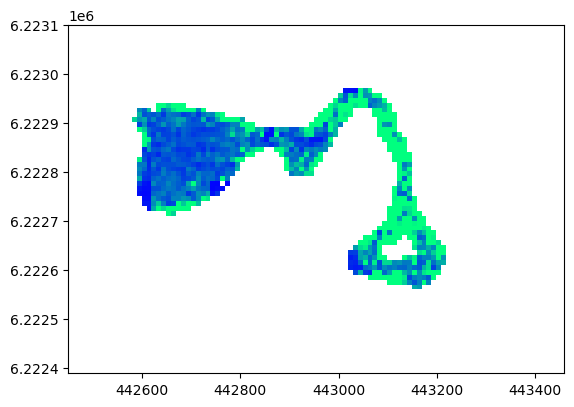

(0.0, 1.0)

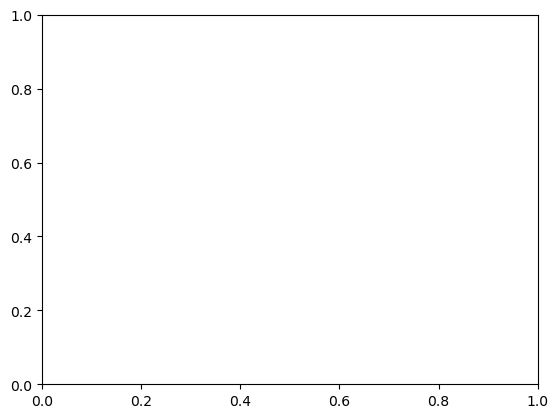

In [246]:
with rasterio.open('TEST_mask_airth.tif') as src:
    print(np.nanmin(src.read(1)))
    print(src.read(2).shape)
    print(src.read(3).shape)
    print(src.read(4).shape)
#     plt.imshow(src.read(26),
#               cmap='winter', vmin=0, vmax=50, 
#                extent=[lon_min, lon_max,
#                       lat_min, lat_max]
#               )
    show(src.read(26), transform=src.transform, cmap='winter', vmin=0, vmax=50, )
    
    
plt.gca().get_xlim()

In [236]:
(lon_min - lon_max)/(lat_min - lat_max)

2.847776890308839

In [234]:
101/71

1.4225352112676057

0


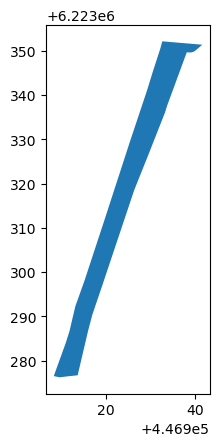

1


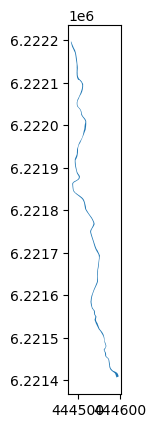

2


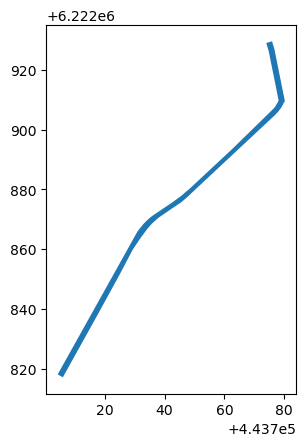

3


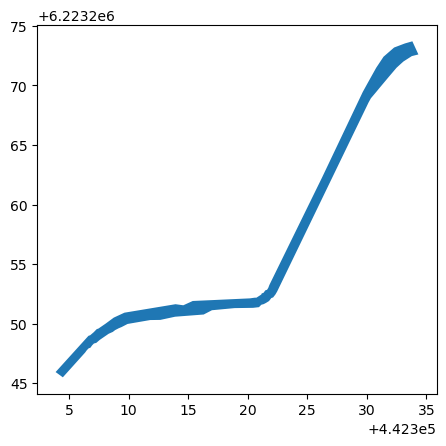

4


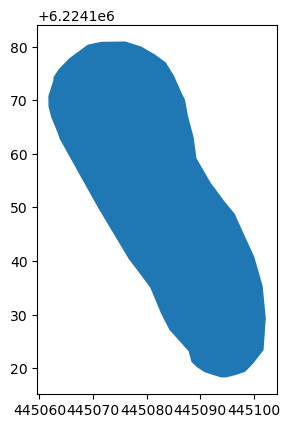

5


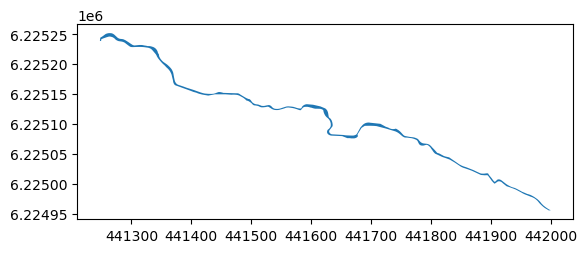

6


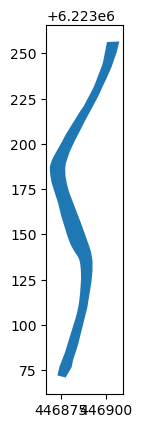

7


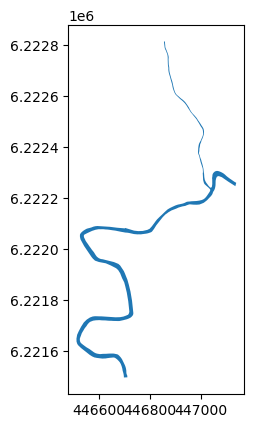

8


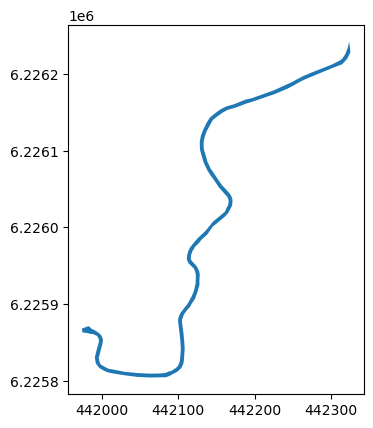

9


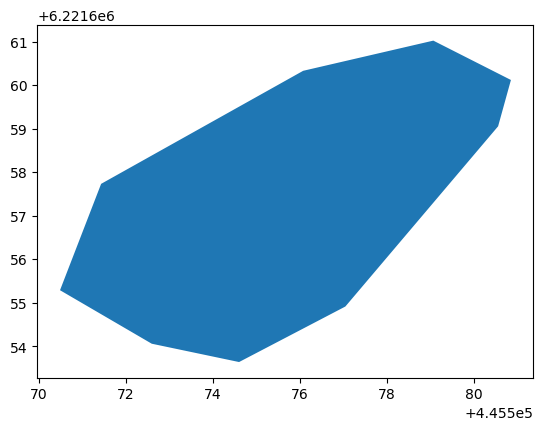

10


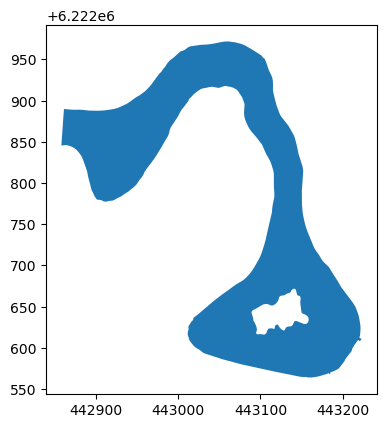

11


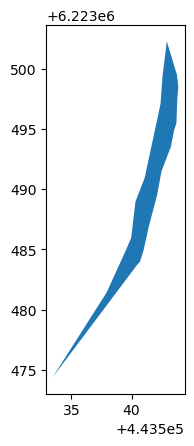

12


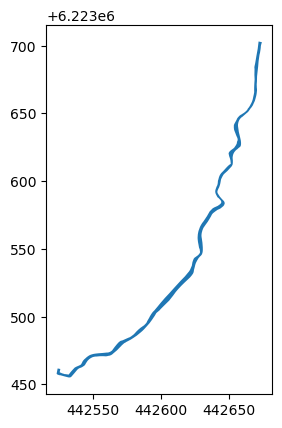

13


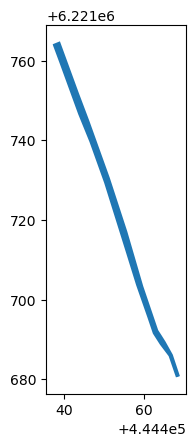

14


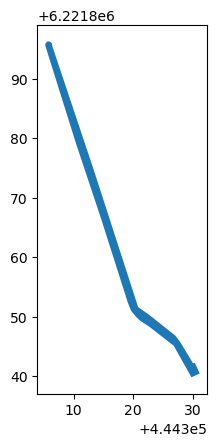

15


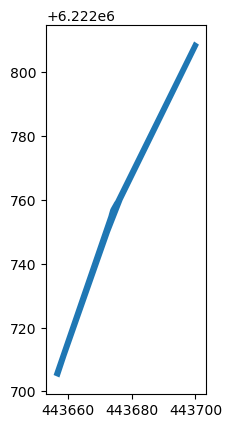

16


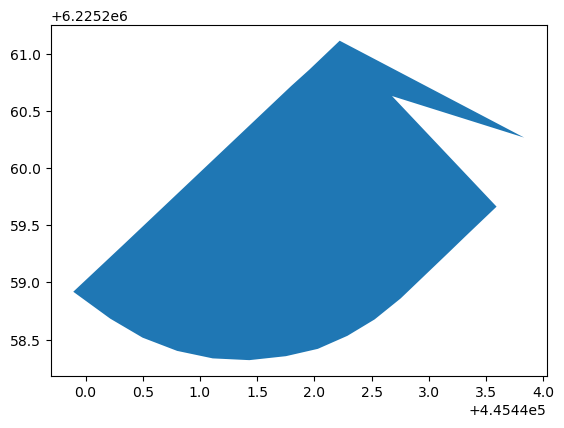

17


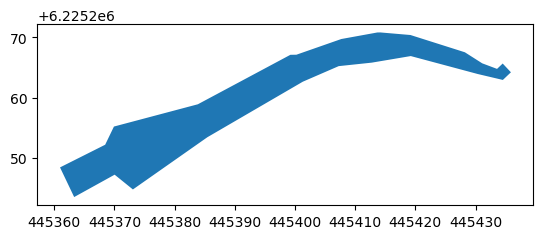

18


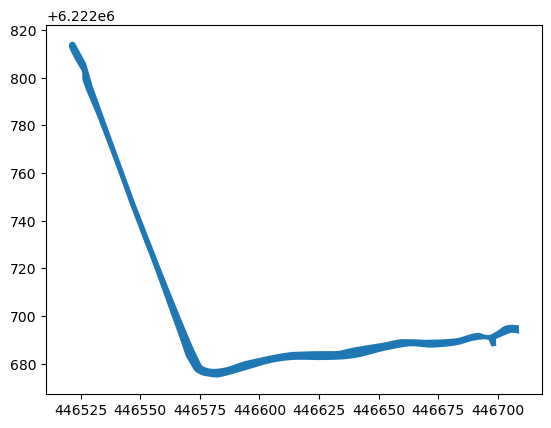

19


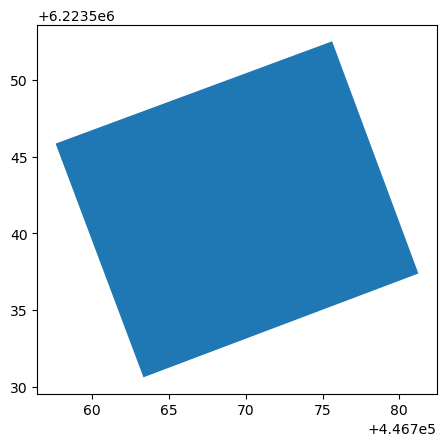

20


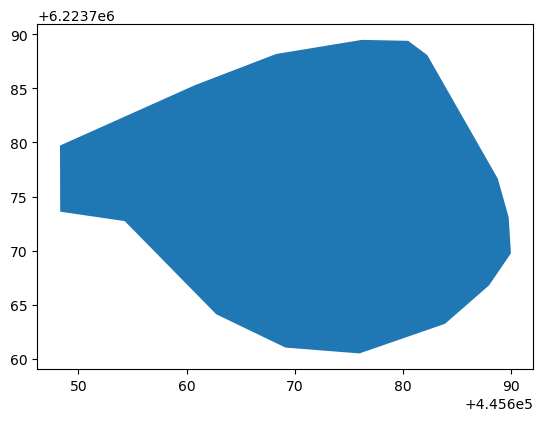

21


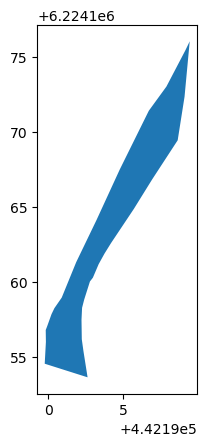

22


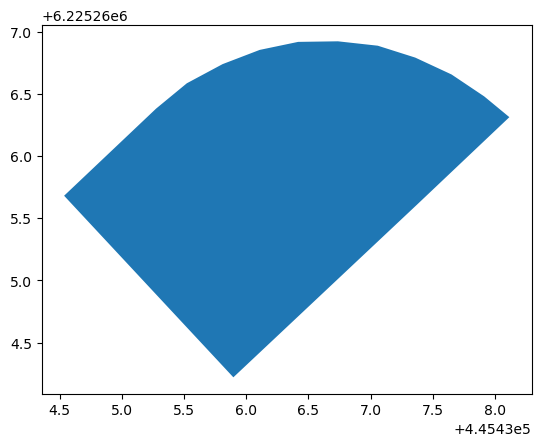

23


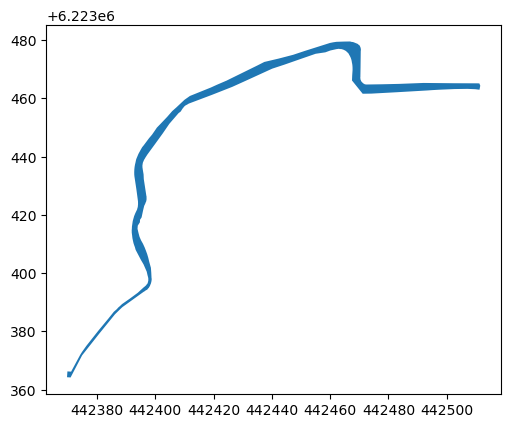

24


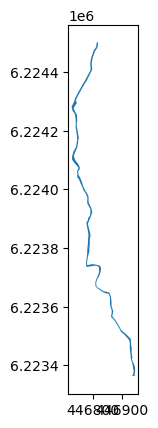

25


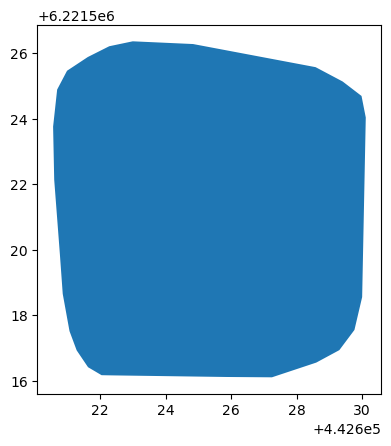

26


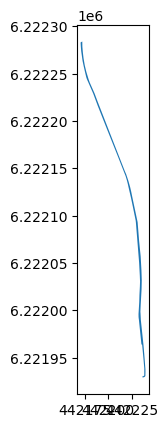

27


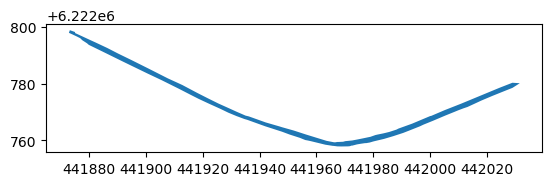

28


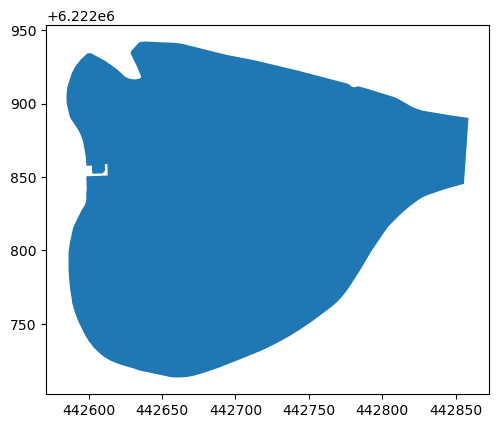

29


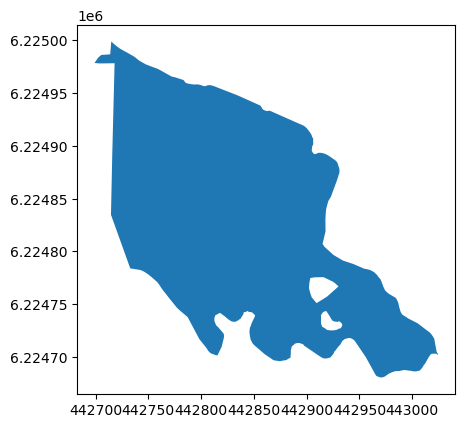

30


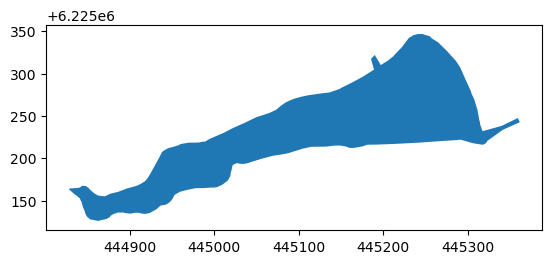

31


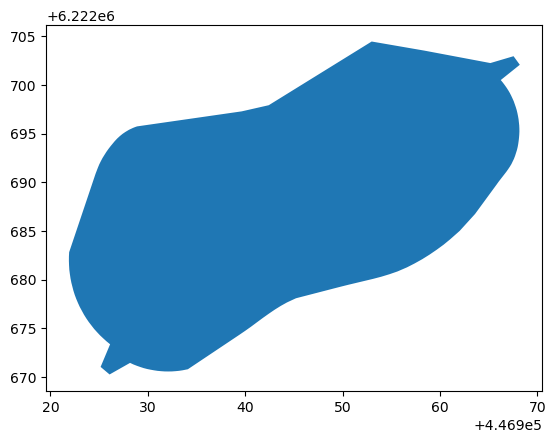

32


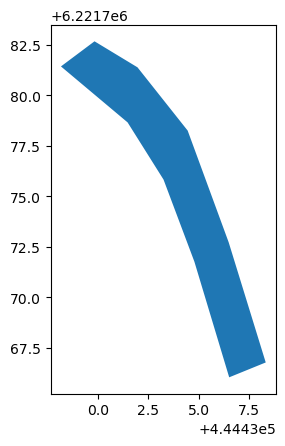

33


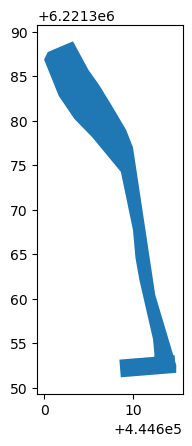

34


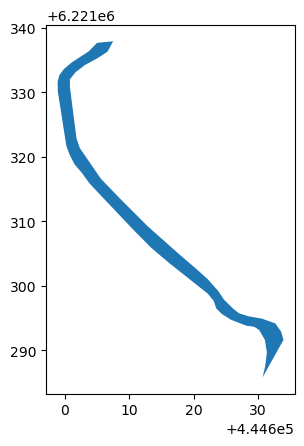

35


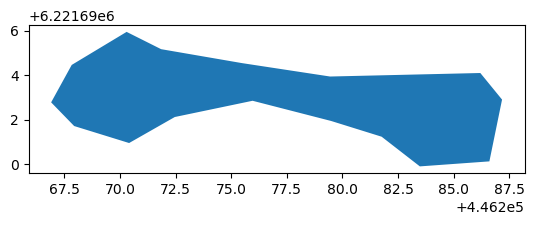

36


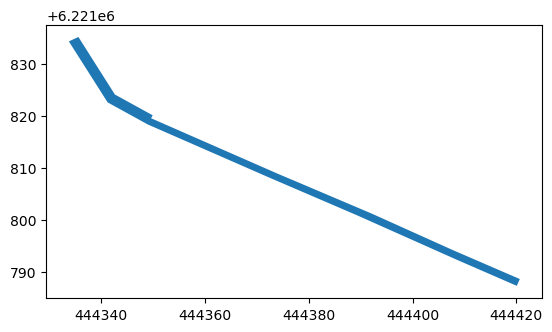

37


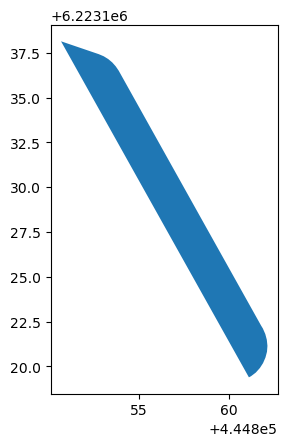

38


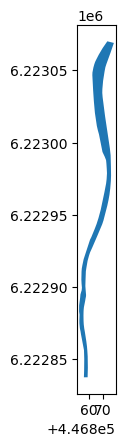

39


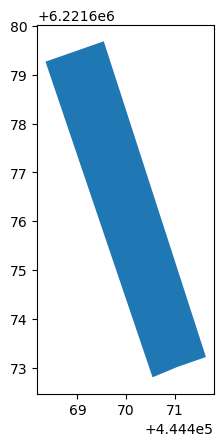

40


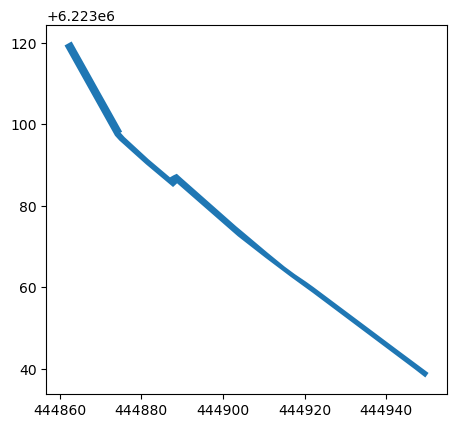

41


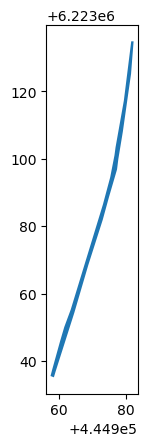

42


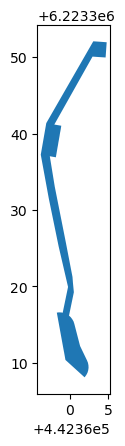

43


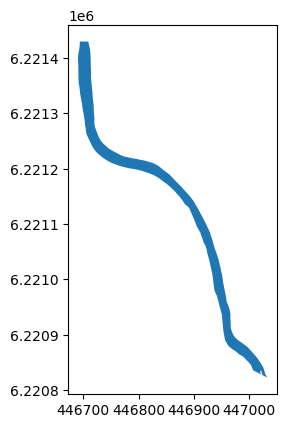

44


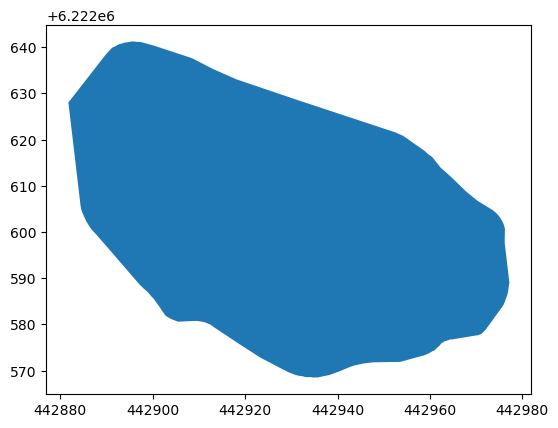

45


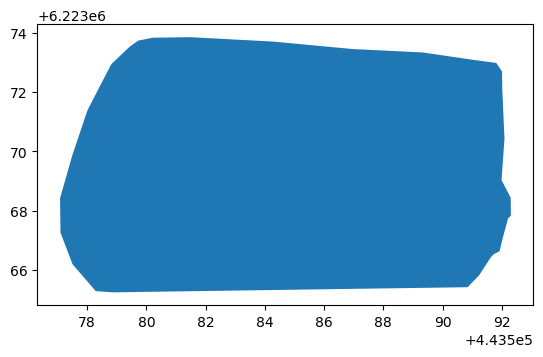

46


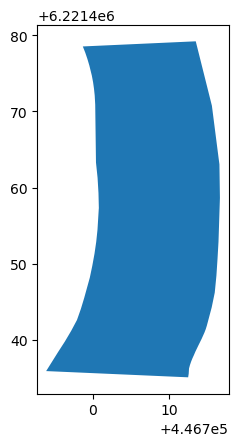

47


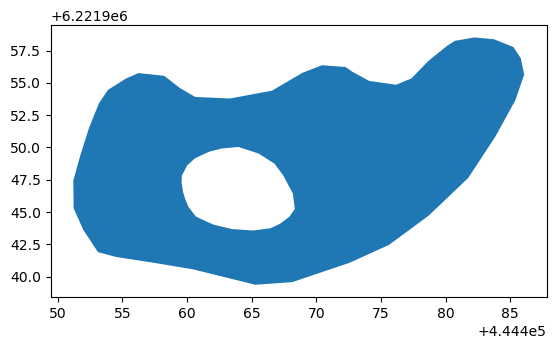

48


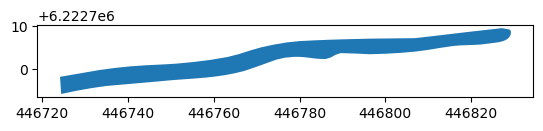

49


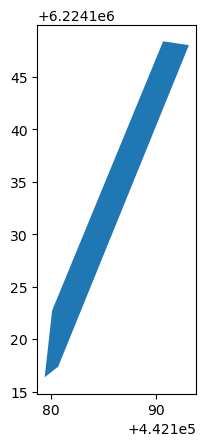

50


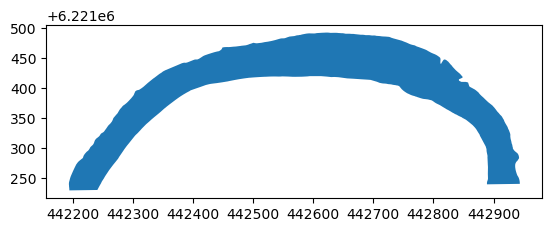

In [162]:
for ind in water_area.index:
    print(ind)
    water_area.loc[ind:ind].plot()
    plt.show()
    # 10 is rhs of loch
    # 28 is lhs of loch

# Next, I need to work out how to do this for arbitrary chl-a products with superdoves as well as S2.

workflow should be approx:

- work out good chl-a product in Python
- generate Raster of chl-a products in Python
- mask image water extents using Python
- load masked image into QGIS to make nice maps

In [78]:
# nc.variables is a dict with all the data
nc.variables.keys()

dict_keys(['transverse_mercator', 'x', 'y', 'lon', 'lat', 'rhow_443', 'Rrs_443', 'rhow_492', 'Rrs_492', 'rhow_560', 'Rrs_560', 'rhow_665', 'Rrs_665', 'rhow_704', 'Rrs_704', 'rhow_740', 'Rrs_740', 'rhow_783', 'Rrs_783', 'rhow_833', 'Rrs_833', 'rhow_865', 'Rrs_865', 'rhow_1614', 'Rrs_1614', 'rhow_2202', 'Rrs_2202', 'l2_flags', 'chl_oc3'])

In [79]:
chla = nc.variables['chl_oc3'][:]
lat = nc.variables['lat'][:]
lon = nc.variables['lon'][:]
x = nc.variables['x'][:]
y = nc.variables['y'][:]

## try to implement a band ratio chl-a alg on my sentinel 2 nc file

- then try to convert to raster and mask as previously
- this is how I'm going to generate nice images for figures in paper:

In [308]:
# make a new var called chla_2, just using band ratio as a demo
# can obviously do any math operation I want
# can probably use my existing algorithm code if the bands are named similarly

xds['chla_2'] = xds['Rrs_665']/xds['Rrs_704']
# make sure it is named properly
xds['chla_2'].attrs['parameter'] = 'chla_2'

In [309]:
# IMPORTANT
# change long variable names as these are used when we convert to raster as band names
for var in list(xds.data_vars):
    try:
        xds[var].attrs['long_name'] = xds[var].attrs['parameter']
    except KeyError:
        pass
xds

<xarray.Dataset> Size: 776kB
Dimensions:              (x: 101, y: 71)
Coordinates:
    transverse_mercator  int64 8B 0
  * x                    (x) float64 808B 4.425e+05 4.425e+05 ... 4.435e+05
  * y                    (y) float64 568B 6.223e+06 6.223e+06 ... 6.222e+06
Data variables: (12/27)
    lon                  (y, x) float32 29kB -3.926 -3.926 ... -3.91 -3.91
    lat                  (y, x) float32 29kB 56.15 56.15 56.15 ... 56.14 56.14
    rhow_443             (y, x) float32 29kB 0.03792 0.03792 ... 0.03753 0.03753
    Rrs_443              (y, x) float32 29kB 0.01207 0.01207 ... 0.01195 0.01195
    rhow_492             (y, x) float32 29kB 0.0408 0.04462 ... 0.06265 0.06094
    Rrs_492              (y, x) float32 29kB 0.01299 0.0142 ... 0.01994 0.0194
    ...                   ...
    Rrs_1614             (y, x) float32 29kB 0.02881 0.03329 ... 0.06225 0.06225
    rhow_2202            (y, x) float32 29kB 0.06888 0.07988 ... 0.1596 0.1596
    Rrs_2202             (y, x) float32 29kB 0.02193 0.02543 ... 0.05079 0.05079
    l2_flags             (y, x) int32 29kB 0 0 0 0 0 0 0 0 0 ... 4 4 4 0 0 0 0 0
    chl_oc3              (y, x) float32 29kB 5.401 4.589 3.86 ... 5.505 5.832
    chla_2               (y, x) float32 29kB 0.8286 0.7033 ... 0.8607 0.8403
Attributes: (12/403)
    generated_by:                              ACOLITE
    generated_on:                              2024-03-07 14:25:08 GMT
    contact:                                   Quinten Vanhellemont
    product_type:                              NetCDF
    metadata_profile:                          beam
    metadata_version:                          0.5
    ...                                        ...
    ac_bands:                                  1,2,3,4,5,6,7,8,8A
    ac_nbands_fit:                             2
    ac_band1_idx:                              0
    ac_band1:                                  1
    ac_band2_idx:                              1
    ac_band2:                                  2

In [313]:
# convert the nc file with new bands to a raster

xds.rio.to_raster('map_stuff/rasters/raster+chla_test.tif')

# check this worked with good naming of bands
with rasterio.open('map_stuff/rasters/raster+chla_test.tif') as src:
    print(src.descriptions)

('lon', 'lat', 'rhos_443', 'Rrs_443', 'rhos_492', 'Rrs_492', 'rhos_560', 'Rrs_560', 'rhos_665', 'Rrs_665', 'rhos_704', 'Rrs_704', 'rhos_740', 'Rrs_740', 'rhos_783', 'Rrs_783', 'rhos_833', 'Rrs_833', 'rhos_865', 'Rrs_865', 'rhos_1614', 'Rrs_1614', 'rhos_2202', 'Rrs_2202', 'l2_flags', 'chl_oc3', 'chla_2')


In [323]:
# open raster and mask

with rasterio.open("map_stuff/rasters/raster+chla_test.tif") as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=False,
                                                  nodata=np.nan, all_touched=False)
    out_meta = src.meta
    print(src.meta)
    out_desc = src.descriptions

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 101, 'height': 71, 'count': 27, 'crs': CRS.from_epsg(32630), 'transform': Affine(10.0, 0.0, 442450.0,
       0.0, -10.0, 6223100.0)}


In [324]:
# write masked raster data to a new raster file

out_meta.update({"driver": "GTiff",
                 "transform": out_transform})

with rasterio.open("TEST_mask_chla_airth.tif", "w", **out_meta) as dest:
    dest.write(out_image)
    dest.descriptions = out_desc

In [325]:
# check this worked with good naming of bands
with rasterio.open('TEST_mask_chla_airth.tif') as src:
    print(src.descriptions)

('lon', 'lat', 'rhos_443', 'Rrs_443', 'rhos_492', 'Rrs_492', 'rhos_560', 'Rrs_560', 'rhos_665', 'Rrs_665', 'rhos_704', 'Rrs_704', 'rhos_740', 'Rrs_740', 'rhos_783', 'Rrs_783', 'rhos_833', 'Rrs_833', 'rhos_865', 'Rrs_865', 'rhos_1614', 'Rrs_1614', 'rhos_2202', 'Rrs_2202', 'l2_flags', 'chl_oc3', 'chla_2')


# NEXT STEPS

- I have a fairly straightforward process for producing nice maps using whatever chl-a alg I want
- should do this for all S2 and Planet data

TODO:

- re-run acolite using L2W with SD data
- get nice graphs comparing algorithm performance between S2 and SD
- choose fav. algs
- generate chl-a timeseries over last few years
- generate nice figures using the process I've outlined here

-3.9241302013397217
(71, 101)
(71, 101)
(71, 101)


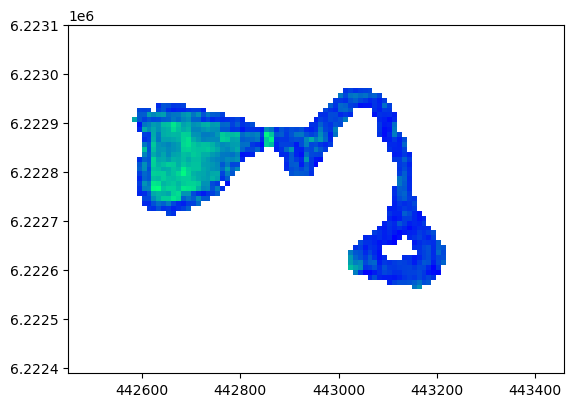

In [318]:
with rasterio.open('TEST_mask_chla_airth.tif') as src:
    print(np.nanmin(src.read(1)))
    print(src.read(2).shape)
    print(src.read(3).shape)
    print(src.read(4).shape)
#     plt.imshow(src.read(26),
#               cmap='winter', vmin=0, vmax=50, 
#                extent=[lon_min, lon_max,
#                       lat_min, lat_max]
#               )
    show(src.read(27), transform=src.transform, cmap='winter', #vmin=0, vmax=50, 
         )

('lon', 'lat', 'rhos_443', 'Rrs_443', 'rhos_492', 'Rrs_492', 'rhos_560', 'Rrs_560', 'rhos_665', 'Rrs_665', 'rhos_704', 'Rrs_704', 'rhos_740', 'Rrs_740', 'rhos_783', 'Rrs_783', 'rhos_833', 'Rrs_833', 'rhos_865', 'Rrs_865', 'rhos_1614', 'Rrs_1614', 'rhos_2202', 'Rrs_2202', 'l2_flags', 'chl_oc3', 'chla_2')


In [80]:
nc.variables['x'][:]

masked_array(data=[442455., 442465., 442475., 442485., 442495., 442505.,
                   442515., 442525., 442535., 442545., 442555., 442565.,
                   442575., 442585., 442595., 442605., 442615., 442625.,
                   442635., 442645., 442655., 442665., 442675., 442685.,
                   442695., 442705., 442715., 442725., 442735., 442745.,
                   442755., 442765., 442775., 442785., 442795., 442805.,
                   442815., 442825., 442835., 442845., 442855., 442865.,
                   442875., 442885., 442895., 442905., 442915., 442925.,
                   442935., 442945., 442955., 442965., 442975., 442985.,
                   442995., 443005., 443015., 443025., 443035., 443045.,
                   443055., 443065., 443075., 443085., 443095., 443105.,
                   443115., 443125., 443135., 443145., 443155., 443165.,
                   443175., 443185., 443195., 443205., 443215., 443225.,
                   443235., 443245., 443255., 44326

In [81]:
lat

masked_array(
  data=[[56.14941 , 56.14941 , 56.14941 , ..., 56.14953 , 56.14953 ,
         56.14953 ],
        [56.14932 , 56.149323, 56.149323, ..., 56.149437, 56.149437,
         56.14944 ],
        [56.14923 , 56.14923 , 56.14923 , ..., 56.149345, 56.14935 ,
         56.14935 ],
        ...,
        [56.1433  , 56.143303, 56.143303, ..., 56.143417, 56.143417,
         56.14342 ],
        [56.14321 , 56.14321 , 56.143215, ..., 56.14333 , 56.14333 ,
         56.14333 ],
        [56.14312 , 56.143124, 56.143124, ..., 56.143238, 56.143238,
         56.14324 ]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [82]:
water_area = geopandas.read_file('map_stuff/Download_airthrey_water_2483224/vml_5464100/ns/vml-ns89nw_Water_Area.shp')
water_line = geopandas.read_file('map_stuff/Download_airthrey_water_2483224/vml_5464100/ns/vml-ns89nw_Water_Line.shp')

In [83]:
water_area = water_area.to_crs(epsg=32630)

(6222395.0, 6223095.0)

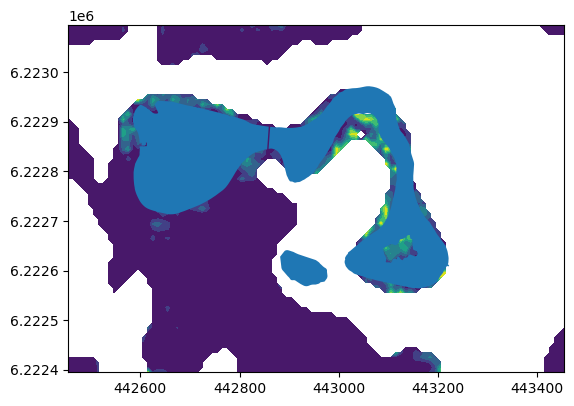

In [85]:
fig, ax = plt.subplots(1, 1)
ax.contourf(x, y, chla)
water_area.plot(ax=ax)
plt.xlim(x.min(), x.max())
plt.ylim(y.min(), y.max())

In [86]:
water_area

,Fid,FeatCode,FeatDesc,geometry
0,idd31a5a51-f309-4a82,15609,Inland Water Polygon,"POLYGON ((446939.594 6223349.755, 446939.266 6..."
1,id4607e8fa-713a-41ee,15609,Inland Water Polygon,"POLYGON ((444596.445 6221409.171, 444591.201 6..."
2,id58cf5a1f-991b-4ef5,15609,Inland Water Polygon,"POLYGON ((443718.637 6222839.919, 443705.968 6..."
3,id19122fac-466e-41a8,15609,Inland Water Polygon,"POLYGON ((442321.348 6223251.640, 442321.149 6..."
4,idbfd0a88f-ba3f-491a,15609,Inland Water Polygon,"POLYGON ((445094.918 6224118.268, 445093.918 6..."
5,id5f93b45e-8e7b-4b5b,15609,Inland Water Polygon,"POLYGON ((441263.181 6225251.699, 441264.132 6..."
6,idc62d8500-12ad-4e6c,15609,Inland Water Polygon,"POLYGON ((446875.587 6223080.231, 446877.264 6..."
7,idc821d634-3bb6-4afc,15609,Inland Water Polygon,"POLYGON ((446881.697 6222658.862, 446881.634 6..."
8,id16dd0431-05d9-4934,15609,Inland Water Polygon,"POLYGON ((442134.874 6226097.714, 442138.040 6..."
9,id6f325e52-6c7e-436f,15609,Inland Water Polygon,"POLYGON ((445577.047 6221654.917, 445574.606 6..."


In [68]:
x

masked_array(data=[442455., 442465., 442475., 442485., 442495., 442505.,
                   442515., 442525., 442535., 442545., 442555., 442565.,
                   442575., 442585., 442595., 442605., 442615., 442625.,
                   442635., 442645., 442655., 442665., 442675., 442685.,
                   442695., 442705., 442715., 442725., 442735., 442745.,
                   442755., 442765., 442775., 442785., 442795., 442805.,
                   442815., 442825., 442835., 442845., 442855., 442865.,
                   442875., 442885., 442895., 442905., 442915., 442925.,
                   442935., 442945., 442955., 442965., 442975., 442985.,
                   442995., 443005., 443015., 443025., 443035., 443045.,
                   443055., 443065., 443075., 443085., 443095., 443105.,
                   443115., 443125., 443135., 443145., 443155., 443165.,
                   443175., 443185., 443195., 443205., 443215., 443225.,
                   443235., 443245., 443255., 44326

In [56]:
map = Basemap(projection='tmerc',
              lat_0=42., lon_0=-3.,
              llcrnrlon=-3.927669, llcrnrlat=56.143547,
              urcrnrlon=-3.912282, urcrnrlat=56.149598, resolution='h')

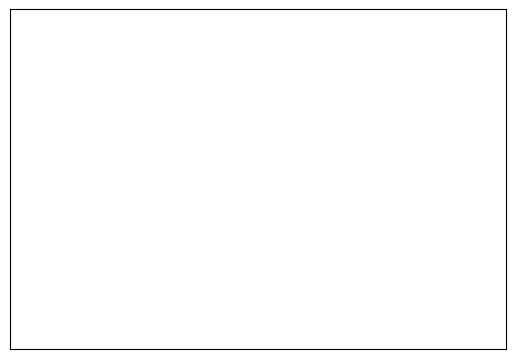

In [57]:
map.drawcoastlines()
map.drawstates()
map.drawcountries()
# map.drawlsmask(land_color='Linen', ocean_color='#CCFFFF') # can use HTML names or codes for colors
map.drawcounties() # you can even add counties (and other shapefiles!)

In [58]:
x,y = map(lon,lat)

In [59]:
x.max()

1096.5500698504839

(0.0, 965.3386375303671)
(0.0, 660.9590526870452)


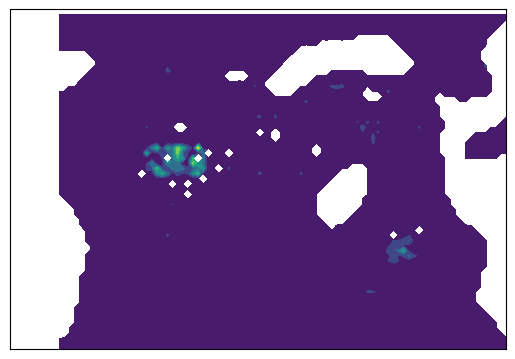

In [60]:
map.contourf(x, y, chla)
water_area.plot(ax=plt.gca())
ax = plt.gca()
print(ax.get_xlim())
print(ax.get_ylim())

<Axes: >

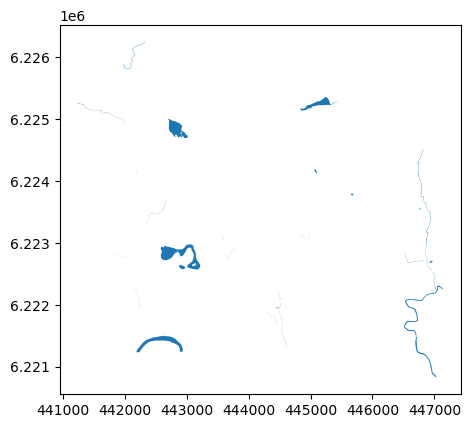

In [61]:
water_area.plot()

In [29]:
lon.shape

(71, 101)

In [31]:
lons.shape

(7171, 7171)